## Código base

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)


## Faturamento por Loja

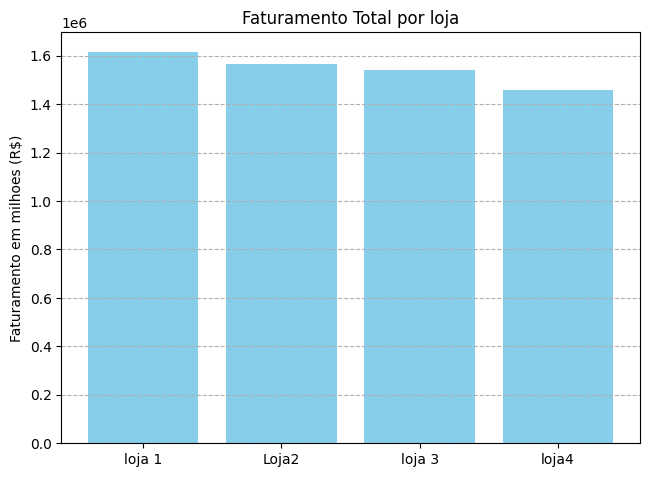

In [3]:
# Organizando dados par o gráfico
lojas = ['loja 1', 'Loja2', 'loja 3', 'loja4']
faturamento_por_loja = [round(sum(loja1['Preço']) + sum(loja1['Frete']), 2),
                        round(sum(loja2['Preço']) + sum(loja2['Frete']), 2),
                        round(sum(loja3['Preço']) + sum(loja3['Frete']), 2),
                        round(sum(loja4['Preço']) + sum(loja4['Frete']), 2)]

# Montando o gráfico

plt.bar(x=lojas, height=faturamento_por_loja, color= 'skyblue')
plt.tight_layout()
plt.title('Faturamento Total por loja')
plt.ylabel('Faturamento em milhoes (R$)')
plt.grid(axis='y', linestyle='--')
plt.show()

## Venda por categoria e por loja

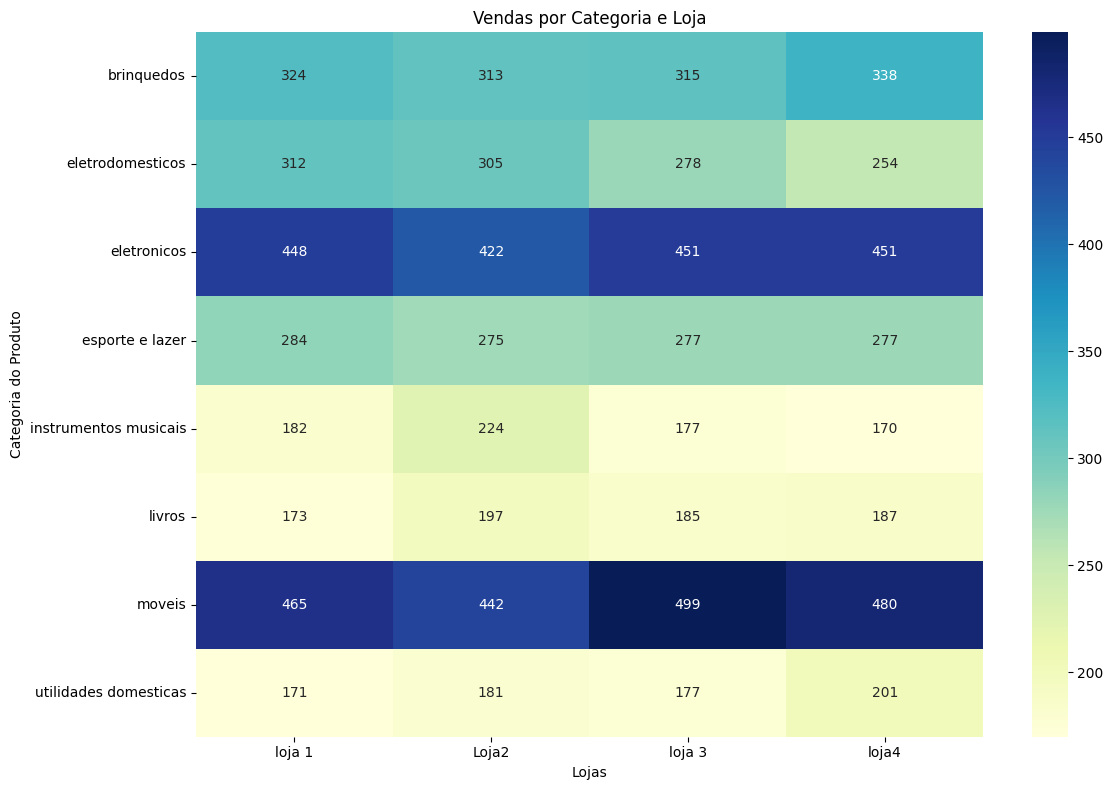

In [4]:

# Criar DataFrame com as contagens
dados = {}
dataframes = [loja1, loja2, loja3, loja4]
for loja_nome, df in zip(lojas, dataframes):
    dados[loja_nome] = df['Categoria do Produto'].value_counts()

# Preenche valores faltantes com 0
heatmap_df = pd.DataFrame(dados).fillna(0).astype(int)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_df, annot=True, fmt="d", cmap="YlGnBu")
plt.title( 'Vendas por Categoria e Loja')
plt.ylabel('Categoria do Produto')
plt.xlabel('Lojas')
plt.tight_layout()
plt.show()

# Média de avaliação por loja

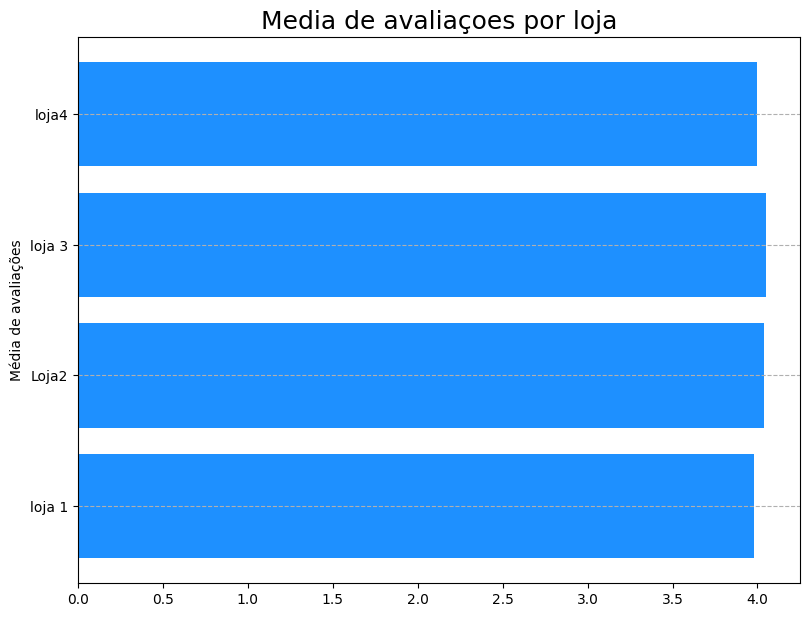

In [5]:
lojas = ['loja 1', 'Loja2', 'loja 3', 'loja4']
df = [loja1, loja2, loja3, loja4]
media_avaliacao_por_loja = [loja1['Avaliação da compra'].mean(),
                            loja2['Avaliação da compra'].mean(),
                            loja3['Avaliação da compra'].mean(),
                            loja4['Avaliação da compra'].mean()]


plt.figure(figsize=(8,6))
plt.barh(y=lojas, width=media_avaliacao_por_loja, color='dodgerblue')

plt.tight_layout()
plt.ylabel('Média de avaliações')
plt.title('Media de avaliaçoes por loja', fontsize=18)
plt.grid(axis='y', linestyle='--')
plt.show()


## Comparação de Vendas por categoria entre lojas

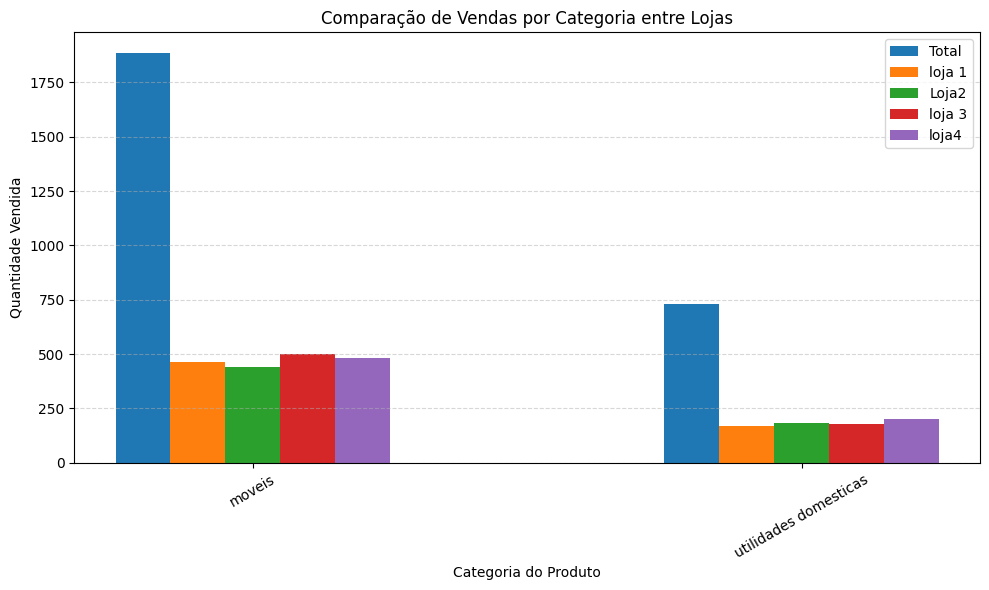

In [6]:
lojas = ['Total', 'loja 1', 'Loja2', 'loja 3', 'loja4']
dataframe= [loja1, loja2, loja3, loja4]

valores = []

# faz uma lista com todos o produtos mais e menos vendidos por todas as lojas juntas
soma_produtos = []

for i, df in enumerate(dataframe):
    soma_produtos.append(df['Categoria do Produto'].value_counts())
    
soma_produtos = sum(soma_produtos)
soma_produtos_max_min = [soma_produtos.max(), soma_produtos.min()]


# # faz uma lista com o número de vendas de cada loja dos produtos mais  menos vendidos em geral
lista_categorias = [soma_produtos.idxmax(), soma_produtos.idxmin()]

for i, df in enumerate(dataframe):
    contagem = df['Categoria do Produto'].value_counts()
    valores.append([contagem.get(categoria, 1) for categoria in lista_categorias])


# unir as duas listas
lista_completa_max_min = [soma_produtos_max_min] + valores

# Definir parâmetros para cada loja, com deslocamento

x = np.arange(len(lista_categorias))
largura = 0.1

# Criar barra para total e cada loja, com deslocamento
plt.figure(figsize= (10, 6))

for i, loja in enumerate(lojas):
    plt.bar(x + i * largura, height=lista_completa_max_min[i], width=largura, label = loja)

plt.xticks(x + largura * (len(lojas) - 1) / 2, lista_categorias, rotation=30)
plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade Vendida')
plt.title('Comparação de Vendas por Categoria entre Lojas')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()



## Frete médio por loja


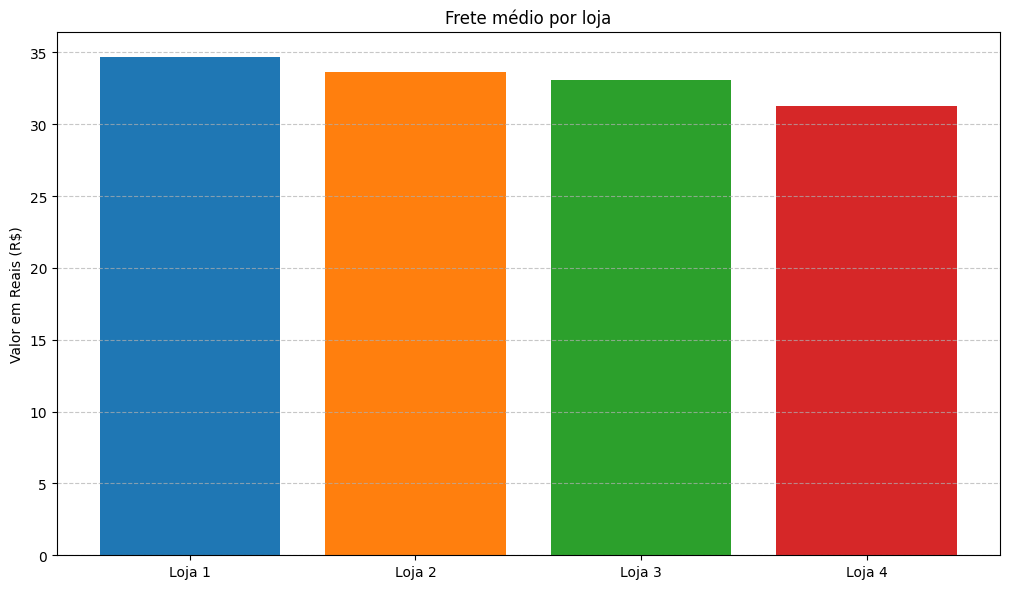

In [7]:
# Frete médio por loja 

# Lista de lojas e DataFrames
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
dataframes = [loja1, loja2, loja3, loja4]

frete_medio = [round(df['Frete'].mean(), 2) for df in dataframe]

# Criando o gráfico

plt.figure(figsize=(10,6))

cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
plt.bar(x=lojas, height=frete_medio, color=cores)
plt.title('Frete médio por loja')
plt.tight_layout()
plt.ylabel('Valor em Reais (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Relatório de Análise de Desempenho das Lojas Alura Store
O presente relatório tem como objetivo analisar o desempenho financeiro e operacional das quatro lojas do grupo E-Commerce Alura Store, com o intuito de identificar qual delas deve ser encerrada. A decisão foi baseada em dados consolidados referentes às quatro lojas, apresentados por meio de gráficos de desempenho nas métricas de faturamento total por loja, vendas por categoria e loja, média de avaliações por loja, vendas por categoria entre lojas e frete médio por loja.

Em relação ao faturamento total, a Loja 4 apresentou o pior desempenho durante o período analisado, indicando uma menor capacidade de geração de receita em comparação com as demais.

Na comparação do número de vendas por categoria entre as lojas:

* A Loja 1 se destaca na venda de eletrodomésticos;

* A Loja 2, em instrumentos musicais;

* A Loja 3, em móveis;

* E a Loja 4, em brinquedos e utilidades domésticas.

No entanto, esses números não apresentam diferenças muito expressivas, exceto nas categorias de eletrodomésticos e instrumentos musicais, onde há um destaque mais claro das Lojas 1 e 2.

As avaliações médias das quatro lojas são semelhantes e satisfatórias, com média próxima de 4,0 pontos, indicando uma boa eficiência operacional de maneira geral.

Em termos de categorias mais vendidas, os móveis lideram, com destaque para a Loja 3. Por outro lado, a categoria com menor volume de vendas foi a de utilidades domésticas, na qual a Loja 4 é a principal participante.

O frete médio varia entre R$ 32 e R$ 35, sendo a Loja 1 a que possui o maior valor e a Loja 4 a que apresenta o menor.

Apesar de todas as lojas apresentarem desempenhos relativamente bons, a Loja 4 possui o menor faturamento total, o que representa um ponto crítico. Além disso, ela atua com maior foco na categoria de utilidades domésticas, que tende a ter menor valor por produto, possui uma avaliação média apenas regular, não se destacando em qualidade percebida e apresenta menor impacto nas principais categorias de vendas da empresa.

Dessa forma, mesmo que os desempenhos não sejam extremamente distantes, a melhor decisão estratégica é encerrar a Loja 4.
